In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing


In [4]:
cal_housing= fetch_california_housing()
df= pd.DataFrame(cal_housing.data, columns= cal_housing.feature_names)
df2= pd.DataFrame(cal_housing.target, columns= cal_housing.target_names)
print(df.head(3))
print(df2.head(3))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
   MedHouseVal
0        4.526
1        3.585
2        3.521


In [5]:
X= df[['MedInc', 'HouseAge']] #median income and house age
y= df2['MedHouseVal']

In [6]:
y  # Median House Value

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

# Train test split

In [7]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model= LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [9]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: MedHouseVal, Length: 4128, dtype: float64

# Predicted values using Linear Regression

In [10]:
y_pred = model.predict(X_test)
y_pred

array([1.05551637, 1.5113978 , 2.30731557, ..., 4.32725202, 1.72627159,
       1.72652128], shape=(4128,))

# Regression metrics

In [11]:
from sklearn.metrics import mean_absolute_error as mae 
error= mae(y_test, y_pred)
print(f"MAE: {error}")


MAE: 0.6059780051879192


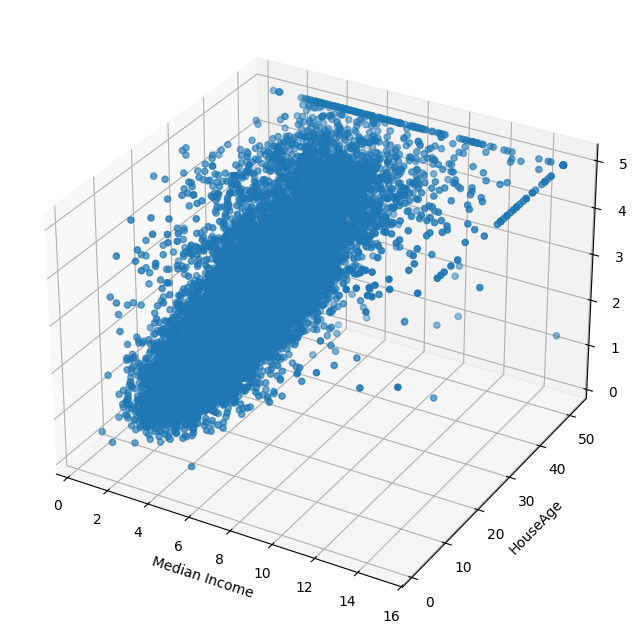

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['MedInc'], X['HouseAge'], y)
ax.set_xlabel('Median Income')
ax.set_ylabel('HouseAge')
ax.set_zlabel('MedHouseVal')
plt.show()


In [13]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -0.11029749287955459
Coefficients: [0.43342284 0.01748574]
